### Cross Validation Task

### 약물 A, B, C, X, Y
#### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 C, 약물 x 및 y 중 하나에 반응했다.
- 미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

#### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholestrol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

#### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import numpy as np
import pandas as pd

drug_df = pd.read_csv("./datasets/drugs.csv")
drug_df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [2]:
# 데이터 확인(탐색)
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
# 중복행 검사
drug_df.duplicated().sum()

0

In [4]:
# 결측치 검사
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
# 수치형 데이터인 나트륨-칼륨에 대해 표준화를 진행하여 이상치를 제거합니다.
from sklearn.preprocessing import StandardScaler

na_to_k_df = drug_df.loc[:, 'Na_to_K'].reset_index()
na_to_k_df

index  Na_to_K
0        0   25.355
1        1   13.093
2        2   10.114
3        3    7.798
4        4   18.043
..     ...      ...
195    195   11.567
196    196   12.006
197    197    9.894
198    198   14.020
199    199   11.349

[200 rows x 2 columns]

In [6]:
std = StandardScaler()
std_na_to_k = std.fit_transform(na_to_k_df[['Na_to_K']])

In [7]:
na_to_k_df.loc[:, 'Na_to_K'] = std_na_to_k

In [8]:
na_to_k_df

index   Na_to_K
0        0  1.286522
1        1 -0.415145
2        2 -0.828558
3        3 -1.149963
4        4  0.271794
..     ...       ...
195    195 -0.626917
196    196 -0.565995
197    197 -0.859089
198    198 -0.286500
199    199 -0.657170

[200 rows x 2 columns]

In [9]:
cond1 = na_to_k_df['Na_to_K'] >= -1.96
cond2 = na_to_k_df['Na_to_K'] <= 1.96
cond = cond1 & cond2

drug_df = drug_df.iloc[na_to_k_df[cond].index].reset_index(drop=True)
drug_df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
183   56   F     LOW        HIGH   11.567  drugC
184   16   M     LOW        HIGH   12.006  drugC
185   52   M  NORMAL        HIGH    9.894  drugX
186   23   M  NORMAL      NORMAL   14.020  drugX
187   40   F     LOW      NORMAL   11.349  drugX

[188 rows x 6 columns]

In [10]:
# LabelEncoder 클래스를 통해 문자열 타입으로 된 범주형 데이터들을 정수형 레이블로 변환합니다.
drug_enc_df = drug_df.copy()

from sklearn.preprocessing import LabelEncoder

drug_encoder = LabelEncoder()
targets = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = targets

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(drug_df['Sex'].tolist())
drug_enc_df['Sex'] = genders

bp_encoder = LabelEncoder()
bps = bp_encoder.fit_transform(drug_df['BP'].tolist())
drug_enc_df['BP'] = bps

cholestrol_encoder = LabelEncoder()
cholestrols = cholestrol_encoder.fit_transform(drug_df['Cholesterol'].tolist())
drug_enc_df['Cholesterol'] = cholestrols

drug_enc_df

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
183   56    0   1            0   11.567     2
184   16    1   1            0   12.006     2
185   52    1   2            0    9.894     3
186   23    1   2            1   14.020     3
187   40    0   1            1   11.349     3

[188 rows x 6 columns]

In [11]:
# train_test_split()을 통해 학습데이터와 테스트데이터를 나눈 후, 
# GridSearchCV를 통해 교차검증을 수행하여 최적의 하이퍼 파라미터를 찾아냅니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

features = drug_enc_df.iloc[:, :-1]
targets = drug_enc_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [3, 4, 5], 'min_samples_split': [15, 16, 17]}

In [12]:
g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [13]:
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [14]:
g_dtc.cv_results_

{'mean_fit_time': array([0.00615239, 0.00625072, 0.00662136, 0.00430784, 0.00361147,
        0.00562429, 0.00344853, 0.0038002 , 0.00359979]),
 'std_fit_time': array([0.00068567, 0.00038094, 0.00079699, 0.00187304, 0.00050017,
        0.0027763 , 0.00045209, 0.00039878, 0.00048942]),
 'mean_score_time': array([0.00275955, 0.00260077, 0.00260162, 0.00243654, 0.00241199,
        0.00200005, 0.00284686, 0.00219998, 0.00199986]),
 'std_score_time': array([3.02804158e-04, 4.90550676e-04, 4.88233052e-04, 4.61389285e-04,
        5.04009694e-04, 8.31393994e-07, 1.57835189e-03, 3.99665569e-04,
        6.32787217e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[15, 16, 17, 15, 16, 17, 15, 16, 17],
              mask=[False, False, False, False, False, False, False, False,

In [15]:
# cv_result_를 통해 나온 파라미터 값별 수치를 데이터프레임으로 시각화합니다.
result_df = pd.DataFrame(g_dtc.cv_results_)
result_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006152      0.000686         0.002760    3.028042e-04   
1       0.006251      0.000381         0.002601    4.905507e-04   
2       0.006621      0.000797         0.002602    4.882331e-04   
3       0.004308      0.001873         0.002437    4.613893e-04   
4       0.003611      0.000500         0.002412    5.040097e-04   
5       0.005624      0.002776         0.002000    8.313940e-07   
6       0.003449      0.000452         0.002847    1.578352e-03   
7       0.003800      0.000399         0.002200    3.996656e-04   
8       0.003600      0.000489         0.002000    6.327872e-04   

  param_max_depth param_min_samples_split  \
0               3                      15   
1               3                      16   
2               3                      17   
3               4                      15   
4               4                      16   
5               4                      17   
6               5                      15   
7               5                      16   
8               5                      17   

                                      params  split0_test_score  \
0  {'max_depth': 3, 'min_samples_split': 15}                0.8   
1  {'max_depth': 3, 'min_samples_split': 16}                0.8   
2  {'max_depth': 3, 'min_samples_split': 17}                0.8   
3  {'max_depth': 4, 'min_samples_split': 15}                1.0   
4  {'max_depth': 4, 'min_samples_split': 16}                1.0   
5  {'max_depth': 4, 'min_samples_split': 17}                1.0   
6  {'max_depth': 5, 'min_samples_split': 15}                1.0   
7  {'max_depth': 5, 'min_samples_split': 16}                1.0   
8  {'max_depth': 5, 'min_samples_split': 17}                1.0   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0                0.9                0.9  ...         0.873333        0.048990   
1                0.9                0.9  ...         0.873333        0.048990   
2                0.9                0.9  ...         0.873333        0.048990   
3                1.0                1.0  ...         0.993333        0.013333   
4                1.0                1.0  ...         0.993333        0.013333   
5                1.0                1.0  ...         0.993333        0.013333   
6                1.0                1.0  ...         0.993333        0.013333   
7                1.0                1.0  ...         0.993333        0.013333   
8                1.0                1.0  ...         0.993333        0.013333   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.916667            0.916667   
1                7            0.916667            0.916667   
2                7            0.916667            0.916667   
3                1            1.000000            1.000000   
4                1            1.000000            1.000000   
5                1            1.000000            1.000000   
6                1            1.000000            1.000000   
7                1            1.000000            1.000000   
8                1            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.908333            0.933333            0.908333   
1            0.908333            0.933333            0.908333   
2            0.908333            0.933333            0.908333   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   
5            1.000000            1.000000            1.000000   
6            1.000000            1.000000            1.000000   
7            1.000000            1.000000            1.000000   
8            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.916667         0.009129  
1          0.916667         0.009129  
2         

In [16]:
print('*최적의 하이퍼 파라미터*')
for param, value in g_dtc.best_params_.items():
    print(f'{param}의 최적값: {value}')
print('*최고 점수*')
print(g_dtc.best_score_)

*최적의 하이퍼 파라미터*
max_depth의 최적값: 4
min_samples_split의 최적값: 15
*최고 점수*
0.9933333333333334


In [17]:
# 최적의 하이퍼 파라미터로 구성된 best_estimator_를 저장합니다.
from copy import deepcopy
dtc = deepcopy(g_dtc.best_estimator_)

In [18]:
# graphviz를 통해 DecisionTreeClassifier를 시각화합니다.
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file='./images/drug_dtc02.dot',
    class_names=drug_encoder.classes_,
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [19]:
import graphviz

with open('./images/drug_dtc02.dot') as f:
    drug_dtc02 = f.read()

drug_dtc02_graph = graphviz.Source(drug_dtc02)

In [20]:
drug_dtc02_graph.render(filename='drug_dtc02', directory="./images", format='png')

'images\\drug_dtc02.png'

<img src="./images/drug_dtc02.png">

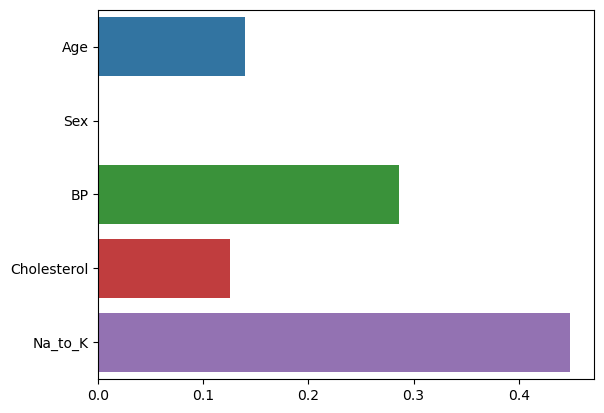

In [21]:
# sns의 barplot을 통해 feature_importances_를 시각화해봅니다.
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

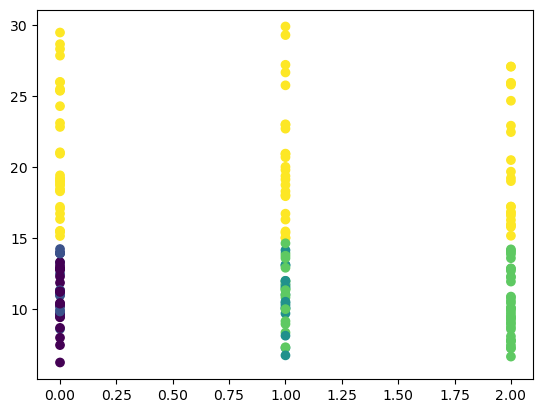

In [22]:
plt.scatter(features.iloc[:, 2], features.iloc[:, -1], c=targets)
plt.show()

In [23]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

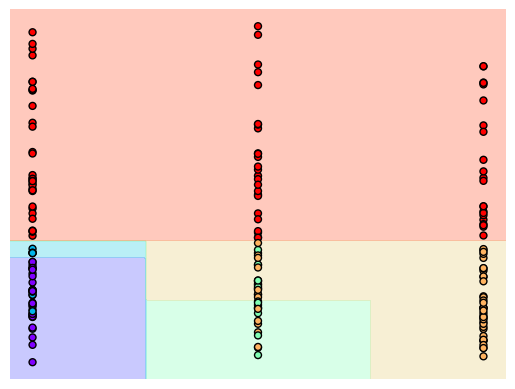

In [24]:
features_2_4 = features.iloc[:, [2, 4]]
visualize_boundary(dtc, features_2_4, targets)

In [25]:
# 이제 해당 모델로 분류 예측을 수행합니다.
dtc = g_dtc.best_estimator_
prediction =  dtc.predict(X_test)
accuracy_score(y_test, prediction)

0.9736842105263158